In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid') # sns에 흰색 그리드 유지
import missingno # 결측치 시각화

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝 알고리즘 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 원핫 인코더
from keras.utils import to_categorical

# 학습 자동 중단
from keras.callbacks import EarlyStopping

# 모델 저장
from keras.callbacks import ModelCheckpoint

# 저장된 딥러닝 모델 불러오기
from keras.models import load_model

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 10                 # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

In [2]:
# MNIST를 위한..
from keras.datasets import mnist
from keras.utils import np_utils

In [3]:
# MNIST 데이터를 다운로드 하고 읽어온다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(f'학습용 데이터 이미지 수 : {X_train.shape[0]}')
print(f'테스트용 데이터 이미지 수 : {X_test.shape[0]}')

학습용 데이터 이미지 수 : 60000
테스트용 데이터 이미지 수 : 10000


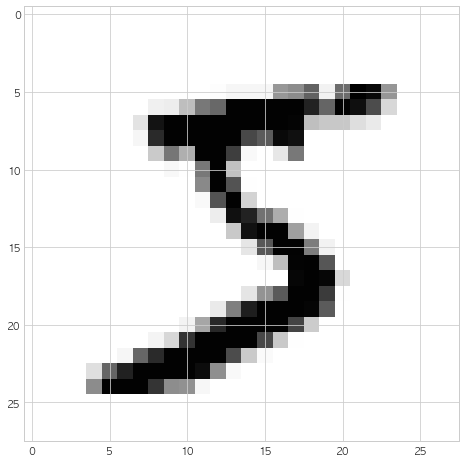

In [5]:
# 그래프로 확인
plt.imshow(X_train[0])
plt.show()

In [6]:
X_train.shape

(60000, 28, 28)

### 기본 딥러닝

In [7]:
# 랜덤 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

In [8]:
# MNIST 데이터를 다운로드 하고 읽어온다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
# 2차원으로 되어 있는 이미지 한장의 데이터를 1차원으로 변환한다.
X_train = X_train.reshape(X_train.shape[0], 784)

# 데이터 정규화
X_train = X_train.astype('float64')
X_train = X_train / 255

In [10]:
# 2차원으로 되어 있는 이미지 한장의 데이터를 1차원으로 변환한다.
X_test = X_test.reshape(X_test.shape[0], 784)

# 데이터 정규화
X_test = X_test.astype('float64')
X_test = X_test / 255

In [11]:
# 결과 데이터 원핫 인코딩
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
# 모델 설정
model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 모델 저장, 자동 중지
model_path ='models/MNIST/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1)
callback2 = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
# 모델 학습
# validation_data 검증데이터도 바로 확인

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
          epochs=30, batch_size=200, verbose=0, callbacks=[callback1, callback2])


Epoch 00001: saving model to models/MNIST/1-0.14745670557022095.hdf5

Epoch 00002: saving model to models/MNIST/2-0.10213232785463333.hdf5

Epoch 00003: saving model to models/MNIST/3-0.08923842757940292.hdf5

Epoch 00004: saving model to models/MNIST/4-0.07904107123613358.hdf5

Epoch 00005: saving model to models/MNIST/5-0.07360746711492538.hdf5

Epoch 00006: saving model to models/MNIST/6-0.06778217852115631.hdf5

Epoch 00007: saving model to models/MNIST/7-0.0651363879442215.hdf5

Epoch 00008: saving model to models/MNIST/8-0.06271664798259735.hdf5

Epoch 00009: saving model to models/MNIST/9-0.06337478756904602.hdf5

Epoch 00010: saving model to models/MNIST/10-0.06277049332857132.hdf5

Epoch 00011: saving model to models/MNIST/11-0.06598276644945145.hdf5

Epoch 00012: saving model to models/MNIST/12-0.07234923541545868.hdf5

Epoch 00013: saving model to models/MNIST/13-0.05936126783490181.hdf5

Epoch 00014: saving model to models/MNIST/14-0.06517267227172852.hdf5

Epoch 00015: sa

In [18]:
# 모델 불러오기
best_model = load_model('models/MNIST/23-0.06818538904190063.hdf5')
best_model

In [19]:
# 정확도 측정
model.evaluate(X_test, y_test)[1]


313/313 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9833


0.983299970626831

In [20]:
# 테스트 셋의 오차값
y_vloss = history.history['val_loss']
y_vloss[:5]

[0.14745670557022095,
 0.10213232785463333,
 0.08923842757940292,
 0.07904107123613358,
 0.07360746711492538]

In [21]:
# 학습 데이터의 오차
y_loss = history.history['loss']
y_loss[:5]

[0.3026984930038452,
 0.1237625777721405,
 0.0812748447060585,
 0.06019718572497368,
 0.045109156519174576]

- 학습한 데이터에 잘 적응되어 loss값이 점차 낮아지나 테스트 데이터에서 loss값이 점차 낮아지지 않을때 과적합을 의심

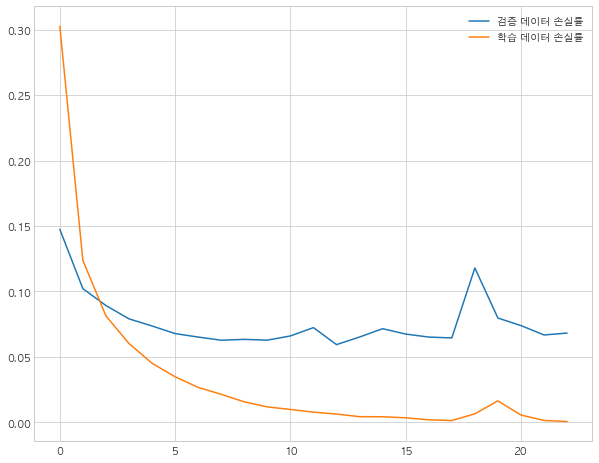

In [22]:
# 그래프 
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='검증 데이터 손실률')
plt.plot(x_len, y_loss,  label='학습 데이터 손실률')
plt.legend()
plt.show()